# Пространственные методы обработки изображений

In [2]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [3]:
def img_input(img_path, size=(0,0), type=1):
    img = cv2.imread(img_path,type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img

Функция вывода изображения

In [4]:
def img_print(images, titles, row_and_colm=(0,0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

### Задание 6.1 Создать файл с зашумлением изображения шумом типа соль-перец.

Создаем 3 возможных цвета - красный, зеленый и синий. Помещаем их в кортеж

In [5]:
red, green, blue = (255, 0, 0), (0, 255, 0), (0, 0,255)
rgb = [red, green, blue]

Создаем функцию с параметрами (<наше изображение>, <вероятность зашумления>), создаем массив нулей такого же размера и формата как исходное изображение, задаем порог, Пробегаем все столбцы и для каждого из них пробегаем все строки, задаем случайное число от 0 до 1, Если это случайное число выпало больше нашего порога задаем пикселю случайное значение из кортежа Иначе оставляем пиксель без изменения и возвращаем получившееся изображение

In [6]:
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn > thres:
                output[i][j] = random.choice(rgb)
            else:
                output[i][j] = image[i][j]

    return output

Загружаем картинку

In [7]:
image = img_input('pic/Cat.jpg',size=(900,600))

Применяем к нашему изображению image, созданную функцию sp_noise, где 0.3 - вероятность зашумления пикселя

In [8]:
noise_img = sp_noise(image,0.3)

Выводим результат, для наглядности так же выводим оригинал

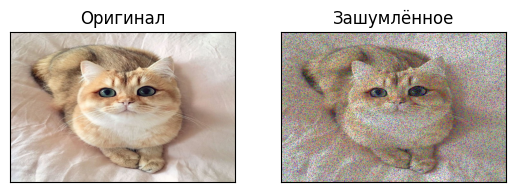

In [9]:
title = ['Оригинал', 'Зашумлённое']
res = [image, noise_img]

img_print(res, title)

### Задание 6.2 Провести сглаживание изображения с помощью функции cv2.filter2D (), используя ядро 10×10.

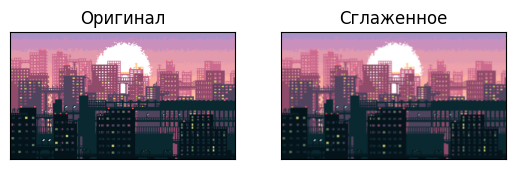

In [10]:
image = img_input('pic/pixel.png')

kernel = np.ones((10,10),np.float32)/100
dst = cv2.filter2D(image,-1,kernel)

title = ['Оригинал', 'Сглаженное']
res = [image, dst]

img_print(res, title)

### Задание 6.3 Провести усреднение изображения с помощью функции cv2.blur (), используя ядро 6×6.


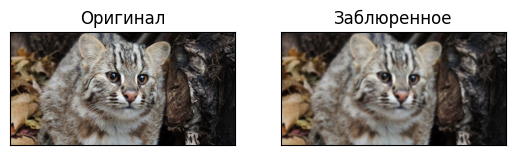

In [11]:
image = img_input('pic/Cat3.jpg')

blur = cv2.blur(image,(6,6))

title = ['Оригинал', 'Заблюренное']
res = [image, blur]

img_print(res, title)

### Задание 6.4 Добавить к исходному изображению 20−30% шума. Провести фильтрацию изображения по Гауссу, используя ядро 5×5.

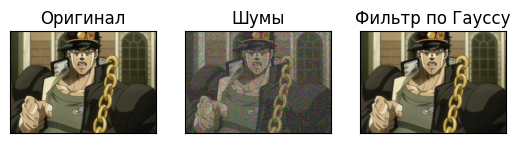

In [12]:
image = img_input('pic/jojo.jpg')


mash =sp_noise(image, 0.5)
blur = cv2.GaussianBlur(image,(5,5), 0)


title = ['Оригинал', 'Шумы', 'Фильтр по Гауссу']
res = [image, mash, blur]

img_print(res, title)

### Задание 6.5 Добавить к исходному изображению 20–50% шума. Провести медианную фильтрацию изображения, используя ядро 5x5.

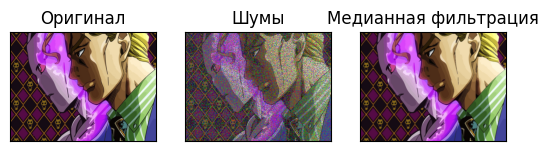

In [13]:
image = img_input('pic/jojo2.jpg')


mash =sp_noise(image, 0.5)
median = cv2.medianBlur(image,5)


title = ['Оригинал', 'Шумы', 'Медианная фильтрация']
res = [image, mash, median]

img_print(res, title)

### Задание 6.6 Создать файл с изображением, в котором обязательно присутствуют вертикальные и горизонтальные линии. С помощью оператора Собеля обнаружить и выделить эти линии.


In [14]:
image = img_input('pic/shahmati.jpg');

Функция Собеля для вычисления вертикальных линий

In [15]:
sobel_vertical = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_vertical = cv2.Sobel(sobel_vertical, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.normalize(sobel_vertical, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

Функция Собеля для вычисления горизонтальных линий

In [16]:
sobel_horizontal = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobel_horizontal = cv2.Sobel(sobel_horizontal, cv2.CV_64F, 0, 1, ksize=5)
sobel_horizontal = cv2.normalize(sobel_horizontal, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

Вывод

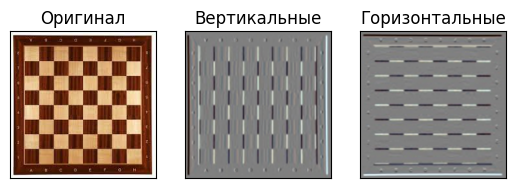

In [17]:
res = [image, sobel_vertical, sobel_horizontal]
title = ['Оригинал', 'Вертикальные', 'Горизонтальные']

img_print(res, title)

### Задание 6.7 Сравнить оба способа для горизонтального фильтра Собела с преобразованием в cv2.CV_8U и без него.

In [18]:
image = img_input('pic/jojo3.jpg')

На выходе: dtype = cv2.CV_8U

In [19]:
sobelx8u = cv2.Sobel(image,cv2.CV_8U,1,0,ksize=5)

На выходе: dtype = cv2.CV_64F

In [20]:
sobelx64f = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

Вывод

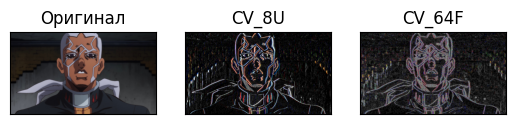

In [21]:
res = [image ,sobelx8u ,sobel_8u]
title = ['Оригинал', 'CV_8U', 'CV_64F']

img_print(res, title)

### Задание 6.8 Создать файл с изображением, который обязательно содержит вертикальные и горизонтальные линии. С помощью оператора Превитта обнаружить и выделить эти линии.


In [22]:
image = img_input('pic/dom.jpg')

Создаем ядро (маску) для x

In [23]:
x_mask = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

Создаем ядро (маску) для y

In [24]:
y_mask = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

Функция соединения изображения с ядром (в данном случае с X, то есть выбраны будут горизонтальные линии), здесь -1 –это глубина изображения (если значение отрицательное, то глубина соответствует исходному изображению, как и cv2.CV_64F)


In [25]:
img_prewittx = cv2.filter2D(image, -1, x_mask)

Соединение изображения с ядром Y, выбор вертикальных линий

In [26]:
img_prewitty = cv2.filter2D(image, -1, y_mask)

Выведем полученный результат

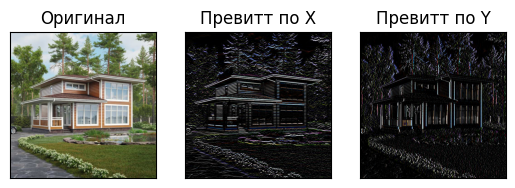

In [27]:
res = [image, img_prewittx, img_prewitty]
title = ['Оригинал', 'Превитт по X', 'Превитт по Y']

img_print(res, title)

### Задание 6.9 Используя оператор Робертса, выделить линии на изображении.

In [28]:
image = img_input('pic/avtolines.kpg.jpg', type=0)

Создадим маски для ядра X(kernel1) и Y(kernel2)

In [29]:
kernel1 = np.array([[1, 0], [0, 1]])
kernel2 = np.array ([[0, 1],[0, 1]])

Выделим линии

In [30]:
img_robx = cv2.filter2D(image, -1, kernel1)
img_roby = cv2.filter2D(image, -1, kernel2)

Выведем:

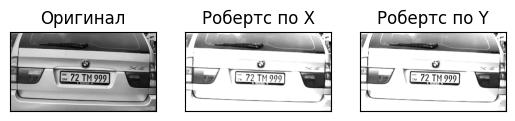

In [31]:
res = [image,img_robx, img_roby]
title = ['Оригинал', 'Робертс по X', 'Робертс по Y']

img_print(res, title, hard_type='gray')

### Задание 6.10 Создать файл с изображением, в котором присутствуют перепады изображения. С помощью оператора Лапласа обнаружить и выделить эти перепады.

In [32]:
image = img_input('pic/jojo5.jpg')
image = image.astype(np.uint16) # изменение типа данных на uint16
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

Используем оператор Лапласа для обнаружения и выделения перепадов на изображении

In [33]:
# laplacian = cv2.Laplacian(image, cv2.CV_64F)

Выведем результат

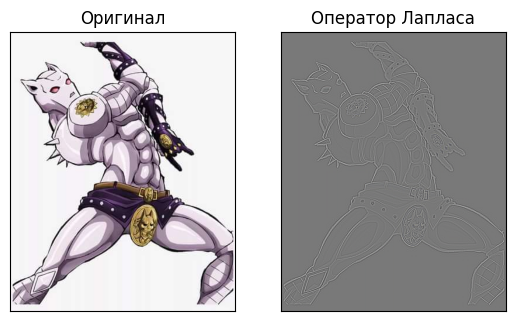

In [34]:
res = [image, laplacian]
title = ['Оригинал', 'Оператор Лапласа']

img_print(res, title)